## Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data frames

In [100]:
df1 = pd.read_excel(r'Downloads/Gapminder_key_1.xlsx')
df2 = pd.read_excel(r'Downloads/Gapminder_key_2.xlsx')

## Displaying Data Frames

In [101]:
print(df1)

          country  year  population continent
0     Afghanistan  1952     8425333      Asia
1     Afghanistan  1957     9240934      Asia
2     Afghanistan  1962    10267083      Asia
3     Afghanistan  1967    11537966      Asia
4     Afghanistan  1972    13079460      Asia
...           ...   ...         ...       ...
1699     Zimbabwe  1987     9216418    Africa
1700     Zimbabwe  1992    10704340    Africa
1701     Zimbabwe  1997    11404948    Africa
1702     Zimbabwe  2002    11926563    Africa
1703     Zimbabwe  2007    12311143    Africa

[1704 rows x 4 columns]


In [102]:
print(df2)

          country  year  life_exp     gdp_cap
0     Afghanistan  1952    28.801  779.445314
1     Afghanistan  1957    30.332  820.853030
2     Afghanistan  1962    31.997  853.100710
3     Afghanistan  1967    34.020  836.197138
4     Afghanistan  1972    36.088  739.981106
...           ...   ...       ...         ...
1699     Zimbabwe  1987    62.351  706.157306
1700     Zimbabwe  1992    60.377  693.420786
1701     Zimbabwe  1997    46.809  792.449960
1702     Zimbabwe  2002    39.989  672.038623
1703     Zimbabwe  2007    43.487  469.709298

[1704 rows x 4 columns]


## Merge both data frames on variable country and year

In [103]:
data = pd.merge(df1,df2,how = 'outer', on=['country','year'])
print(data)

          country  year  population continent  life_exp     gdp_cap
0     Afghanistan  1952     8425333      Asia    28.801  779.445314
1     Afghanistan  1957     9240934      Asia    30.332  820.853030
2     Afghanistan  1962    10267083      Asia    31.997  853.100710
3     Afghanistan  1967    11537966      Asia    34.020  836.197138
4     Afghanistan  1972    13079460      Asia    36.088  739.981106
...           ...   ...         ...       ...       ...         ...
1699     Zimbabwe  1987     9216418    Africa    62.351  706.157306
1700     Zimbabwe  1992    10704340    Africa    60.377  693.420786
1701     Zimbabwe  1997    11404948    Africa    46.809  792.449960
1702     Zimbabwe  2002    11926563    Africa    39.989  672.038623
1703     Zimbabwe  2007    12311143    Africa    43.487  469.709298

[1704 rows x 6 columns]


## Calculate Standard deviation for variable life_exp

In [104]:
sd = data['life_exp'].std()

print(sd)


12.917107415241187


## Calculate the mean of variable gdp_cap

In [105]:
mean_gdp = data['gdp_cap'].mean()

mean_gdp

7215.327081212142

## Get Data types of each variables

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


## Change the type of Country and Continent

In [107]:
data = data.astype({'country':'category','continent':'category'})

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


## Count of unique countries

In [130]:
data_dup=data.drop_duplicates(subset='country')
data_dup['country'].count()

142

In [133]:
df=data

## Display the minimum life_exp for the year 2007

In [134]:
data_2007 = df[df['year']==2007]
min = data_2007[data_2007.life_exp == data_2007.life_exp.min()]
print(min)

        country  year  population continent  life_exp      gdp_cap
1463  Swaziland  2007     1133066    Africa    39.613  4513.480643


## Display the maximum life_exp for the year 2007

In [135]:
max = data_2007[data_2007.life_exp == data_2007.life_exp.max()]

max

,country,year,population,continent,life_exp,gdp_cap
803,Japan,2007,127467972,Asia,82.603,31656.06806


## Plot a graph for Year Vs life_exp

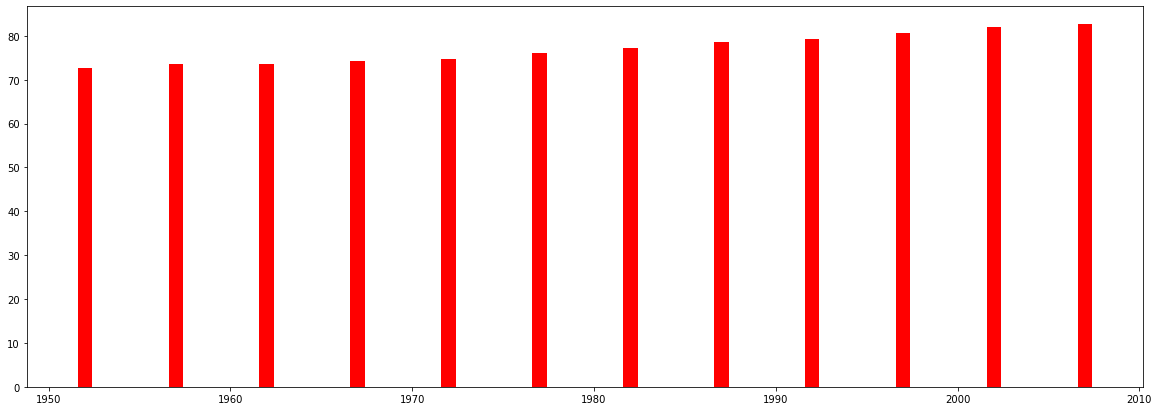

In [145]:
x = data.year
y = data.life_exp
plt.figure(figsize=(20,7))
plt.bar(x,y,color = 'r')
plt.show()

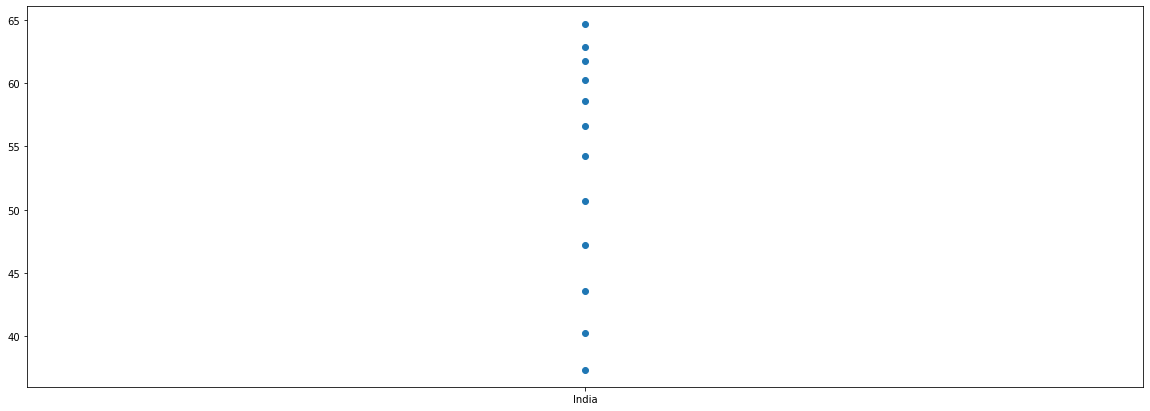

In [218]:
Ind = data[data['country'] == 'India']
plt.figure(figsize=(20,7))
x = Ind['country']
y = Ind['life_exp']
plt.scatter(x,y)

## Calculate the average gdp and avg gdp_cap

In [177]:
avg = np.average(data_2007['gdp_cap']*data_2007['population'])
print("Average gdp = ",avg)
avg_gdp = np.average(data_2007['gdp_cap'])
print("Average gdp_cap = ",avg_gdp)

Average gdp =  409220666999.3279
Average gdp_cap =  11680.071819878167


## Describe the data

In [179]:
data.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


## Plot a graph for gdp_cap Vs life_exp

<AxesSubplot:xlabel='gdp_cap', ylabel='life_exp'>

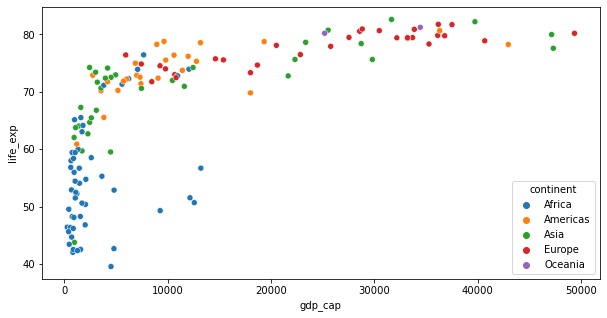

In [182]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x="gdp_cap",y="life_exp",hue="continent",data=data_2007)

## Plot a graph for year Vs gdp for India

<AxesSubplot:xlabel='year', ylabel='gdp'>

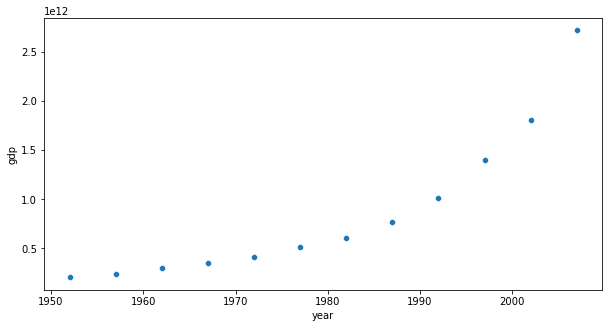

In [191]:
df['gdp'] = df['gdp_cap']*df['population']
Ind = df[df['country']=="India"]
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x="year",y="gdp",data=Ind)

## Calculate the median for yearwise for each continents

In [192]:
med = df.groupby(['continent','year']).life_exp.median()
med

continent  year
Africa     1952    38.8330
           1957    40.5925
           1962    42.6305
           1967    44.6985
           1972    47.0315
           1977    49.2725
           1982    50.7560
           1987    51.6395
           1992    52.4290
           1997    52.7590
           2002    51.2355
           2007    52.9265
Americas   1952    54.7450
           1957    56.0740
           1962    58.2990
           1967    60.5230
           1972    63.4410
           1977    66.3530
           1982    67.4050
           1987    69.4980
           1992    69.8620
           1997    72.1460
           2002    72.0470
           2007    72.8990
Asia       1952    44.8690
           1957    48.2840
           1962    49.3250
           1967    53.6550
           1972    56.9500
           1977    60.7650
           1982    63.7390
           1987    66.2950
           1992    68.6900
           1997    70.2650
           2002    71.0280
           2007    72.3960
Europe     1

## Calculate the mean for yearwise for each country

In [195]:
df.groupby(['country','year']).life_exp.mean()

country      year
Afghanistan  1952    28.801
             1957    30.332
             1962    31.997
             1967    34.020
             1972    36.088
                      ...  
Zimbabwe     1987    62.351
             1992    60.377
             1997    46.809
             2002    39.989
             2007    43.487
Name: life_exp, Length: 1704, dtype: float64